In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.Age.mean()

38.85

In [5]:
data["Annual Income (k$)"].mean()

60.56

In [6]:
# using elbow method we can find optimal number of clusters

In [7]:
X = data.iloc[:, [3,4]].values

In [8]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [9]:
from sklearn.cluster import KMeans

C:\Users\Sandeep Tukkunor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


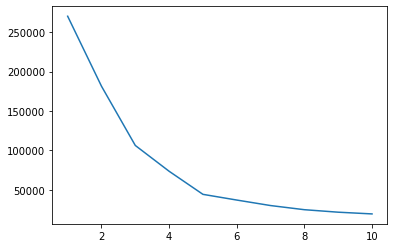

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42, )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
plt.plot(range(1,11),wcss)

In [11]:
kmeans = KMeans(n_clusters=5 ,init="k-means++", random_state=42)
prediction = kmeans.fit_predict(X)

In [12]:
prediction

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

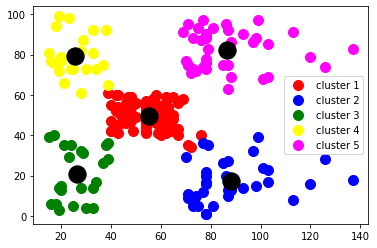

In [43]:
# visualizing the cluster
plt.scatter(X[prediction == 0 , 0 ], X[prediction== 0 , 1] , s = 100, c = 'red', label = "cluster 1" )
plt.scatter(X[prediction == 1 , 0 ], X[prediction== 1, 1] , s = 100, c = 'blue', label = "cluster 2" )
plt.scatter(X[prediction == 2 , 0 ], X[prediction== 2, 1] , s = 100, c = 'green', label = "cluster 3" )
plt.scatter(X[prediction == 3 , 0 ], X[prediction== 3, 1] , s = 100, c = 'yellow', label = "cluster 4" )
plt.scatter(X[prediction == 4 , 0 ], X[prediction== 4, 1] , s = 100, c = "magenta", label = "cluster 5" )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] , s = 300, c = 'black')
plt.legend()
plt.show()


In [40]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])